# Mapping Net Visa Changes Across Australia: A Regional Analysis

This study maps visa trends from 2004 to 2024 across different regions in Australia. It examines how visa arrivals and departures have varied over time to reveal regional patterns and trends. 

More info at [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/industry/tourism-and-transport/overseas-arrivals-and-departures-australia/latest-release#key-statistics)

In [285]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd


In [286]:
import shapely
import fiona
import geopy.distance
from shapely.geometry import Point, Polygon, MultiPolygon

# Arrivals Data 

ARRIVALS DATA: "excel_file_path_ARR" and File - 3401016 Visas ARR

In [287]:
excel_file_path_ARR = "3401016 Visas ARR.xlsx"

travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_ARR.head()

C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\2551079299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)


,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,37390.0,5170.0,8550.0,9060.0,22790.0,6850.0,1860.0,2550.0,880.0,4370.0,2910.0,19410.0,6020.0,114880.0,3280.0,2750.0,146340.0,1200.0,359890.0
1,2004-08-01,37500.0,5130.0,6710.0,7580.0,19430.0,2110.0,870.0,450.0,460.0,1080.0,250.0,5220.0,5180.0,105300.0,4340.0,2750.0,122780.0,980.0,304160.0
2,2004-09-01,36180.0,4490.0,6710.0,7860.0,19060.0,1000.0,800.0,190.0,790.0,580.0,270.0,3640.0,4400.0,97500.0,7390.0,2710.0,115640.0,960.0,299870.0
3,2004-10-01,39900.0,5170.0,7140.0,9010.0,21320.0,2040.0,1210.0,830.0,890.0,480.0,440.0,5900.0,5600.0,119060.0,7440.0,2380.0,140380.0,1360.0,373070.0
4,2004-11-01,33620.0,4470.0,6190.0,7370.0,18030.0,1520.0,670.0,140.0,470.0,440.0,370.0,3600.0,4140.0,138590.0,7420.0,2510.0,156270.0,1810.0,326660.0


In [288]:
excel_file_path_DEP = "3401017 Visas DEP.xlsx"
travel_data_DEP = pd.read_excel(excel_file_path_DEP, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_DEP.head()

,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,38770.0,4500.0,5860.0,7180.0,17540.0,3360.0,1110.0,870.0,440.0,1800.0,1420.0,9010.0,5190.0,101150.0,4240.0,3600.0,123190.0,1130.0,318740.0
1,2004-08-01,37630.0,3420.0,5480.0,7440.0,16340.0,830.0,620.0,100.0,290.0,990.0,470.0,3310.0,4050.0,123840.0,4050.0,2980.0,138230.0,950.0,313760.0
2,2004-09-01,33670.0,3640.0,5560.0,8540.0,17740.0,1290.0,900.0,670.0,380.0,440.0,410.0,4090.0,4110.0,92980.0,3700.0,2970.0,107860.0,910.0,313000.0
3,2004-10-01,39950.0,3520.0,5820.0,6340.0,15690.0,1050.0,780.0,240.0,180.0,440.0,210.0,2900.0,3910.0,116660.0,3010.0,2930.0,129410.0,890.0,305870.0
4,2004-11-01,32770.0,4080.0,6390.0,6600.0,17060.0,6440.0,760.0,1500.0,160.0,1800.0,1280.0,11940.0,3910.0,139990.0,3580.0,3250.0,162680.0,1630.0,333640.0


# Histograms for the Distributions of Visas. (ALL Categories)

These histograms help to show how often different types of visas are used in arrivals and departures. By displaying the number of times each visa type occurs, they make it easy to see which visas are most and least common. This visual tool provides a quick overview of the data, offering a brief understanding of the trends and distributions before diving into more detailed analysis. Additionally, with separate histograms for permanent visas, temporary student visas, and temporary skilled visas, they allow for a clear comparison of usage patterns across these different visa categories.

These graphs provide a valuable overview of the distribution and range of visa usage. By visualizing the frequencies of different visa counts through arrivals and departures, we gain insight into how visa numbers vary across different categories or time periods. This understanding helps us identify common ranges of visa counts and recognize any significant deviations or trends. Such an overview establishes a foundation for deeper analysis, allowing us to better interpret how specific factors influence visa patterns.

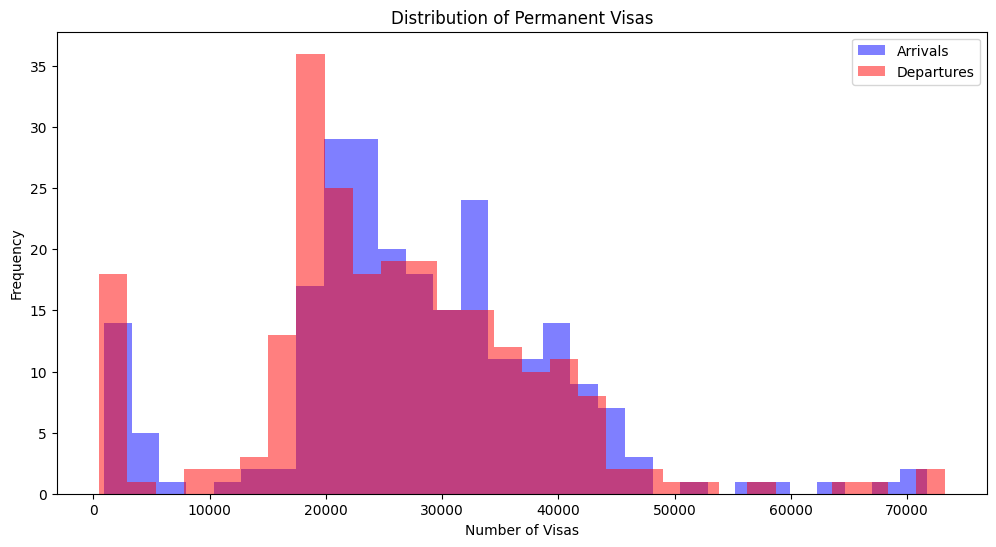

In [289]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Permanent Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Permanent Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Permanent Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

# Sub-Category Pie Chart 
This is a pie chart that introduces us to what makes up the category Permanent Visas - Total. These 3 sub-cateogries consists of Other Visas, Family Visas and Skilled Visas. 

Quick Explanation: 

Other Visas -  refers to a category of permanent residency visas that do not fall into the primary classifications of skilled, family, or humanitarian visas. It includes a variety of less common permanent residency options

Skilled Visas - are visas that are designed for individuals with specific skills and qualifications needed in a country. They are part of a broader skilled migration program aimed at attracting skilled workers to contribute to the economy.

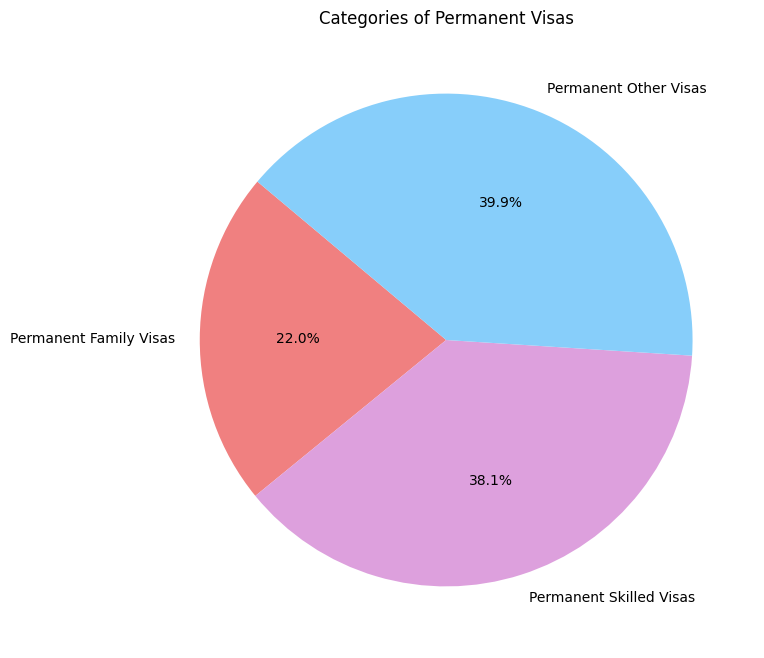

In [360]:
categories = ['Permanent Family Visas', 'Permanent Skilled Visas','Permanent Other Visas']
values = [4005390.0, 6930410.0, 7260460.0]
colors = ['lightcoral','plum','lightskyblue']

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
# Add a title
plt.title('Categories of Permanent Visas')

# Show the plot
plt.show()

# Distribution of Temporary Student Visas

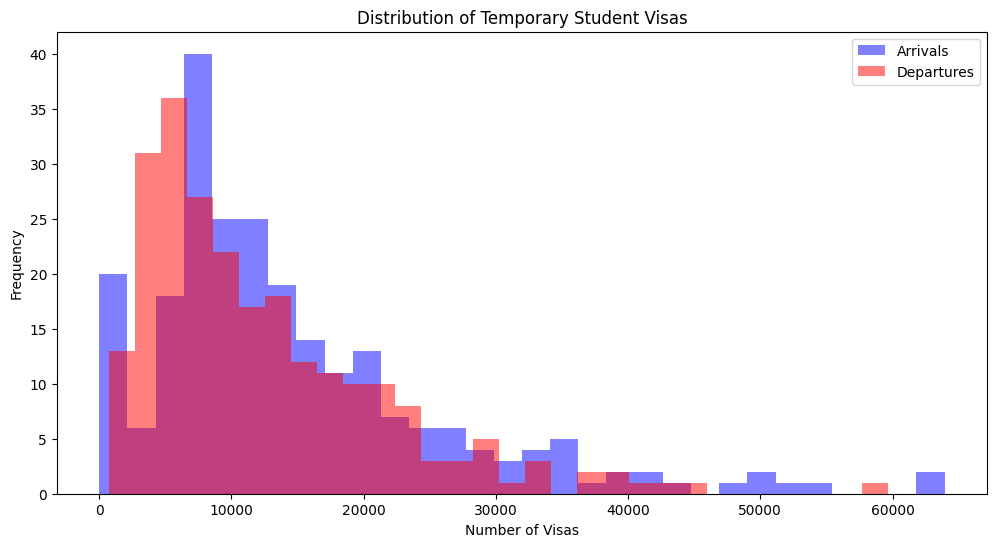

In [290]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Temporary Student Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Student Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Student Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

# Sub-Category Pie Chart
This pie chart is representation of what makes up the category Permanent Visas - Total. The sub-categories can include visas in Higher Education, VET, Schools, ELICO, Postgraduates, and other students. 

Quick explanation: 

Schools -  represents a specific category of student visas for those attending primary or secondary schools. It is used for tracking and analyzing visa data related to international students in these educational settings.

Independent ELICOS - refers to visas issued for students enrolled in standalone English language courses offered by independent institutions.

Other students - refers to a category of student visas for international students enrolled in educational programs that do not fit into more specific categories (short courses, workshops and seminars, specialised training).

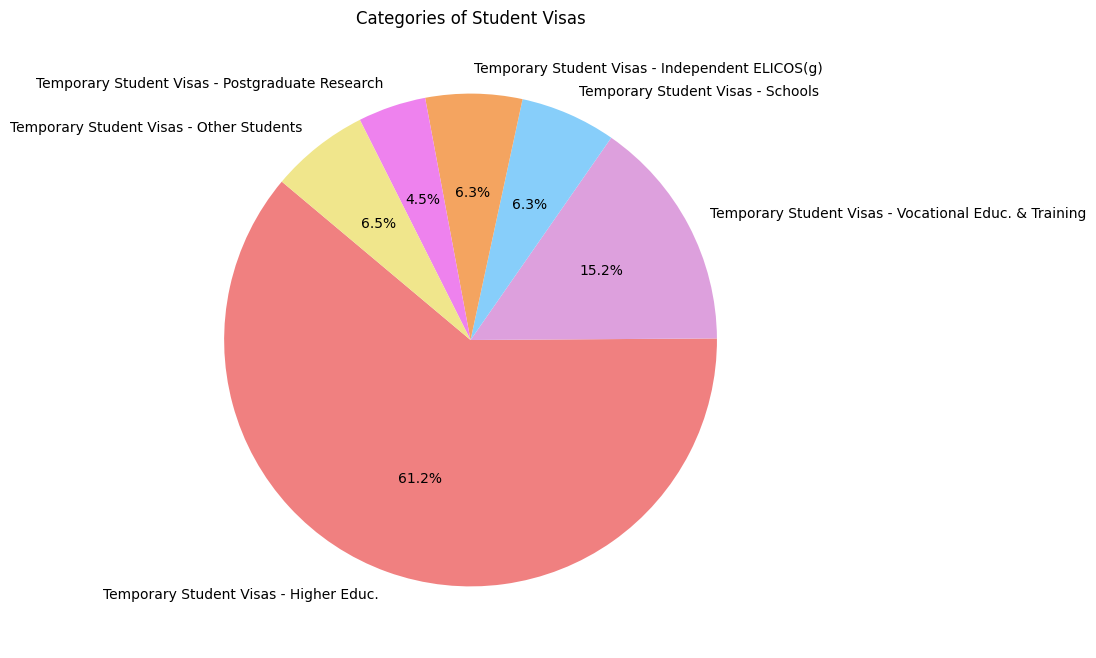

In [361]:
categories = ['Temporary Student Visas - Higher Educ.',
'Temporary Student Visas - Vocational Educ. & Training',
'Temporary Student Visas - Schools',
'Temporary Student Visas - Independent ELICOS(g)',
'Temporary Student Visas - Postgraduate Research',
'Temporary Student Visas - Other Students']
values = [5793070.0, 1441010.0, 594780.0, 600040.0, 422420.0, 612600.0 ]
colors = ['lightcoral','plum','lightskyblue', 'sandybrown', 'violet','khaki']

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
# Add a title
plt.title('Categories of Student Visas')

# Show the plot
plt.show()

Yes. Similarly to the Permanent Skilled Visa, a Temporary Skilled Visa is the same but for a shorter period of time.

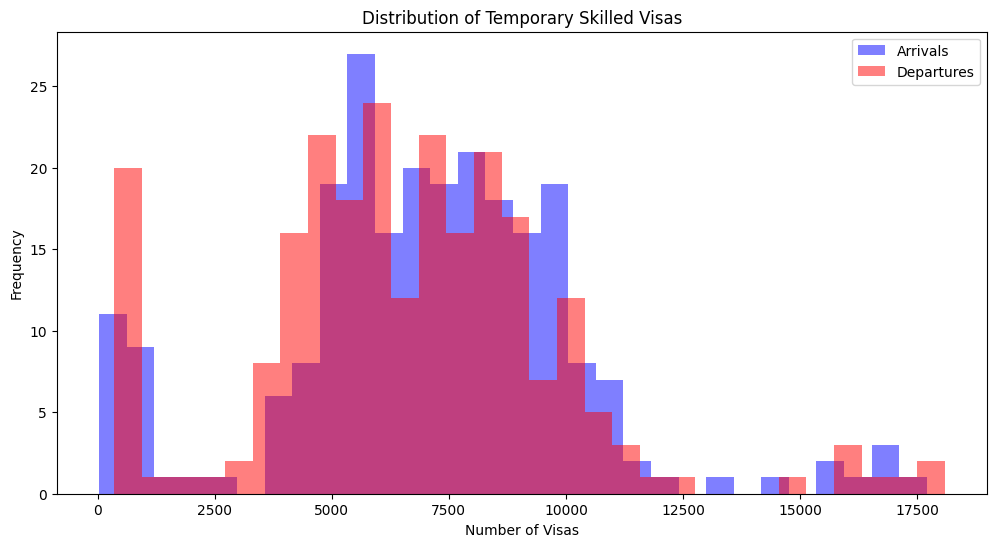

In [291]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Temporary Skilled Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Skilled Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Skilled Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

# PIECHARTS
This section is data to make a piechart.
Permanent Visas - Underlying Categories

In [342]:
sheet_name = 'Overall'  # Specify the sheet name
df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=16)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Specify the correct column names
column_names = [
    'Permanent Family Visas', 
    'Permanent Skilled Visas',
    'Permanent Other Visas'
]  # Ensure these match exactly

# Initialize a dictionary to store the sums for each column
column_sums = {}

# Iterate through each column and calculate the sum separately
for col in column_names:
    try:
        col_sum = df.loc[16:254, col].sum()
        column_sums[col] = col_sum
        print(f"Sum of values in column '{col}' from row 17 to 255: {col_sum}")
    except KeyError as e:
        print(f"Error: The column '{col}' was not found in the DataFrame.")
        print(e)

# Optionally, you can print the final dictionary with all sums
print("\nFinal sums for each column:")
for col, sum_value in column_sums.items():
    print(f"{col}: {sum_value}")

Sum of values in column 'Permanent Family Visas' from row 17 to 255: 4005390.0
Sum of values in column 'Permanent Skilled Visas' from row 17 to 255: 6930410.0
Sum of values in column 'Permanent Other Visas' from row 17 to 255: 7260460.0

Final sums for each column:
Permanent Family Visas: 4005390.0
Permanent Skilled Visas: 6930410.0
Permanent Other Visas: 7260460.0


In [346]:
excel_file = pd.ExcelFile(excel_file_path_ARR) 
print("Sheet names:", excel_file.sheet_names)

date_format = "%m-%Y"

date_parser = lambda x: pd.to_datetime(x, format=date_format)

excel_file = pd.ExcelFile(excel_file_path_ARR)

print("Sheet names:", excel_file.sheet_names)

sheets = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']
dataframes = {}

for sheet in sheets:
    ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
    ARR_DF.columns = ['Month', 'Special_Category_Visa', 'P_Fam_Visas', 'P_Skilled_Visas', 'P_Other_Visas', 'P_Visas_TOTAL', 'T_Student_Visas_HiEd', 'T_Student_Visas_VET', 'T_Student_Visas_Schools', 'T_Student_Visas_INDP_ELICOS(f)', 'T_Student_Visas_PGrad_Research', 'T_Student_Visas_Other_Students', 'T_Student_Visas_TOTAL', 'T_Skilled_Visas', 'T_Visitor_Visas', 'T_Work_Visas', 'T_Other_Visas', 'T_Visas_TOTAL', 'Other_Visas(g)', 'TOTAL(h)']
    dataframes[sheet] = ARR_DF

for sheet, ARR_DF in dataframes.items():
    print(f"{sheet} data:")
    print(ARR_DF.head(10))

Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']


C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, 

NSW data:
       Month  Special_Category_Visa  P_Fam_Visas  P_Skilled_Visas  \
0 2004-07-01                37390.0       5170.0           8550.0   
1 2004-08-01                37500.0       5130.0           6710.0   
2 2004-09-01                36180.0       4490.0           6710.0   
3 2004-10-01                39900.0       5170.0           7140.0   
4 2004-11-01                33620.0       4470.0           6190.0   
5 2004-12-01                40660.0       4330.0           5990.0   
6 2005-01-01                41720.0       7430.0          11580.0   
7 2005-02-01                32290.0       5020.0           7630.0   
8 2005-03-01                37620.0       5500.0           7250.0   
9 2005-04-01                36690.0       4990.0           8000.0   

   P_Other_Visas  P_Visas_TOTAL  T_Student_Visas_HiEd  T_Student_Visas_VET  \
0         9060.0        22790.0                6850.0               1860.0   
1         7580.0        19430.0                2110.0                870.0

In [316]:
excel_file = pd.ExcelFile(excel_file_path_DEP) 
print("Sheet names:", excel_file.sheet_names)

date_format = "%m-%Y"

date_parser = lambda x: pd.to_datetime(x, format=date_format)

excel_file = pd.ExcelFile(excel_file_path_DEP)

print("Sheet names:", excel_file.sheet_names)

sheets = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']
dataframes = {}

for sheet in sheets:
    DEP_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
    DEP_DF.columns = ['Month', 'Special_Category_Visa', 'P_Fam_Visas', 'P_Skilled_Visas', 'P_Other_Visas', 'P_Visas_TOTAL', 'T_Student_Visas_HiEd', 'T_Student_Visas_VET', 'T_Student_Visas_Schools', 'T_Student_Visas_INDP_ELICOS(f)', 'T_Student_Visas_PGrad_Research', 'T_Student_Visas_Other_Students', 'T_Student_Visas_TOTAL', 'T_Skilled_Visas', 'T_Visitor_Visas', 'T_Work_Visas', 'T_Other_Visas', 'T_Visas_TOTAL', 'Other_Visas(g)', 'TOTAL(h)']
    dataframes[sheet] = DEP_DF

for sheet, DEP_DF in dataframes.items():
    print(f"{sheet} data:")
    print(DEP_DF.head(10))

Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
NSW data:
       Month  Special_Category_Visa  P_Fam_Visas  P_Skilled_Visas  \
0 2004-07-01                38770.0       4500.0           5860.0   
1 2004-08-01                37630.0       3420.0           5480.0   
2 2004-09-01                33670.0       3640.0           5560.0   
3 2004-10-01                39950.0       3520.0           5820.0   
4 2004-11-01                32770.0       4080.0           6390.0   
5 2004-12-01                42010.0       6630.0          10430.0   
6 2005-01-01                38910.0       3650.0           6610.0   
7 2005-02-01                30110.0       3400.0           5660.0   
8 2005-03-01                34590.0       4140.0           5700.0   
9 2005-04-01                37410.0       3600.0           6470.0   

   P_Other_Visas  P_Visas_TOTAL  T_Student_Visas_H

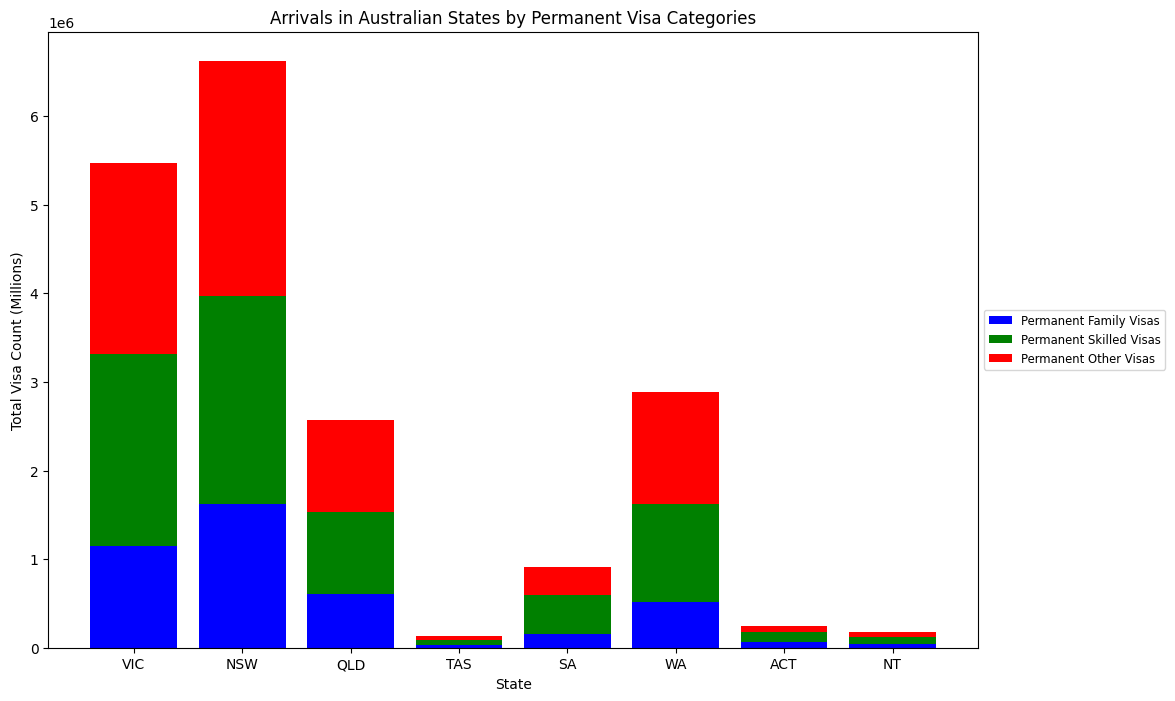

In [293]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']

# Read data from Excel into a dictionary of DataFrames
data = {}
for state in states:
    data[state] = pd.read_excel(excel_file_path_ARR, sheet_name=state, skiprows=15)

# Example categories, make sure these match the column names in your Excel file
categories = ['Permanent Family Visas', 'Permanent Skilled Visas', 'Permanent Other Visas']
colors = ['blue', 'green', 'red']

# Prepare the data for the stacked bar chart
values = {}
for category in categories:
    values[category] = [data[state][category].sum() for state in states]  # Sum the values for each state

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bottom_values = np.zeros(len(states))
for idx, category in enumerate(categories):
    ax.bar(states, values[category], bottom=bottom_values, color=colors[idx], label=category)
    bottom_values += values[category]

# Add titles and labels
plt.title('Arrivals in Australian States by Permanent Visa Categories')
plt.xlabel('State')
plt.ylabel('Total Visa Count (Millions)')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Display the plot
plt.show()

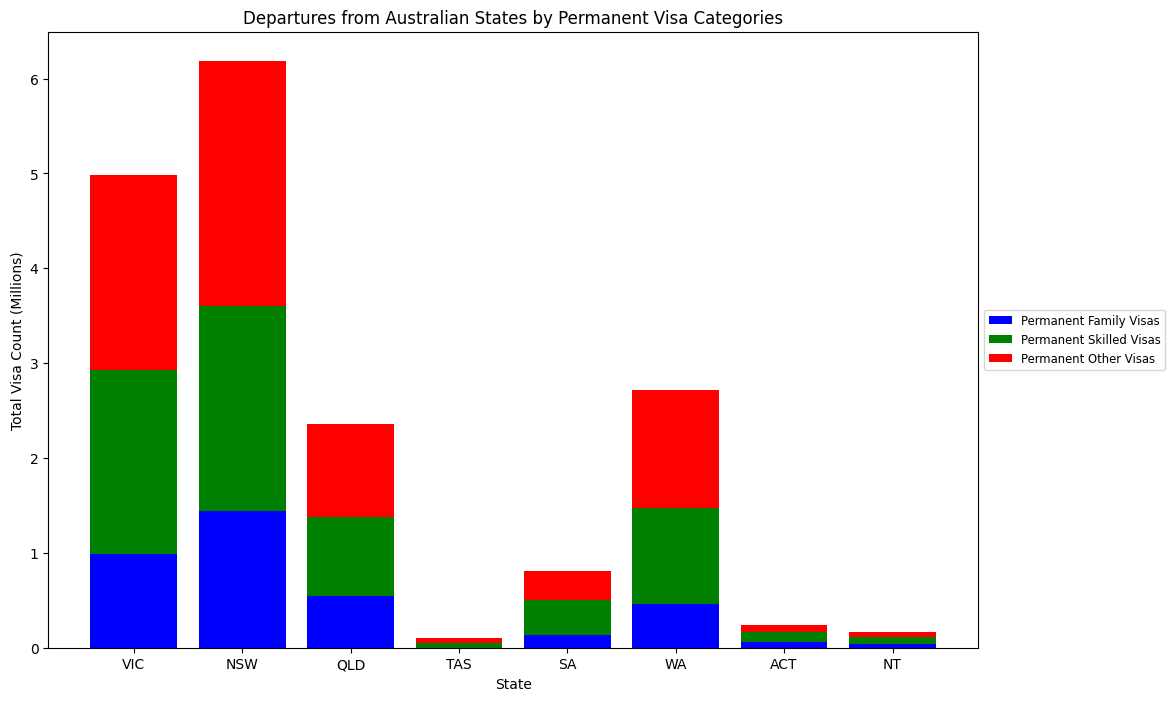

In [294]:
excel_file_path_DEP = r"C:\Users\ameli\1161\travel_dataproject\data_introduction\3401017 Visas DEP.xlsx"
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']

# Read data from Excel into a dictionary of DataFrames
data = {}
for state in states:
    df = pd.read_excel(excel_file_path_DEP, sheet_name=state, skiprows=15)
    df.columns = df.columns.str.strip()  # Strip extra spaces from column names
    data[state] = df

# Example categories, ensure these match the column names in your Excel file
categories = ['Permanent Family Visas', 'Permanent Skilled Visas', 'Permanent Other Visas']
colors = ['blue', 'green', 'red']

# Prepare the data for the stacked bar chart
values = {}
for category in categories:
    values[category] = []
    for state in states:
        if category in data[state].columns:
            values[category].append(data[state][category].sum() / 1_000_000)
        else:
            values[category].append(0)  # Handle missing columns

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bottom_values = np.zeros(len(states))
for idx, category in enumerate(categories):
    ax.bar(states, values[category], bottom=bottom_values, color=colors[idx], label=category)
    bottom_values += values[category]

# Add titles and labels
plt.title('Departures from Australian States by Permanent Visa Categories')
plt.xlabel('State')
plt.ylabel('Total Visa Count (Millions)')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Display the plot
plt.show()

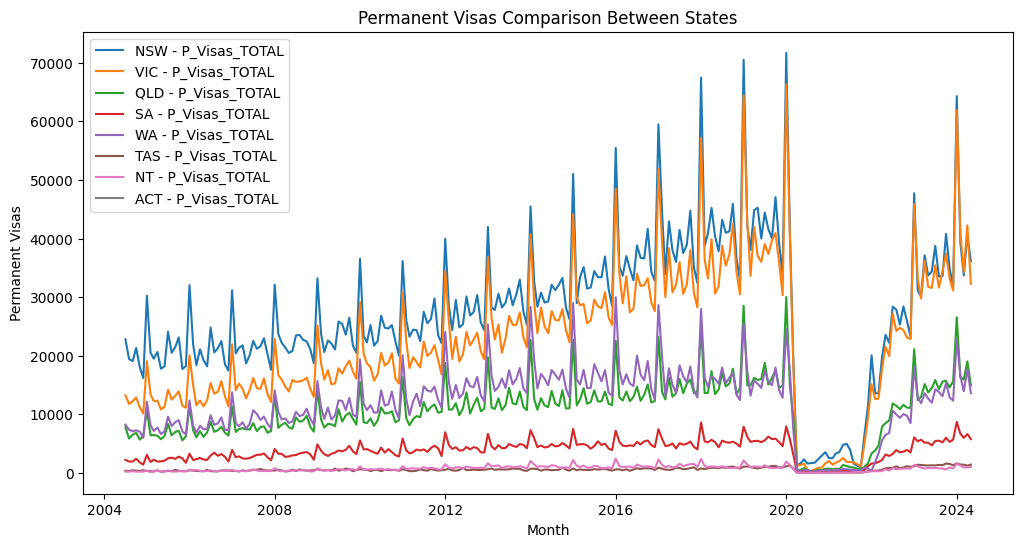

In [295]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'P_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['P_Visas_TOTAL'] = pd.to_numeric(ARR_DF['P_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['P_Visas_TOTAL'], label=f'{sheet} - P_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'P_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('Permanent Visas')
plt.title('Permanent Visas Comparison Between States')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

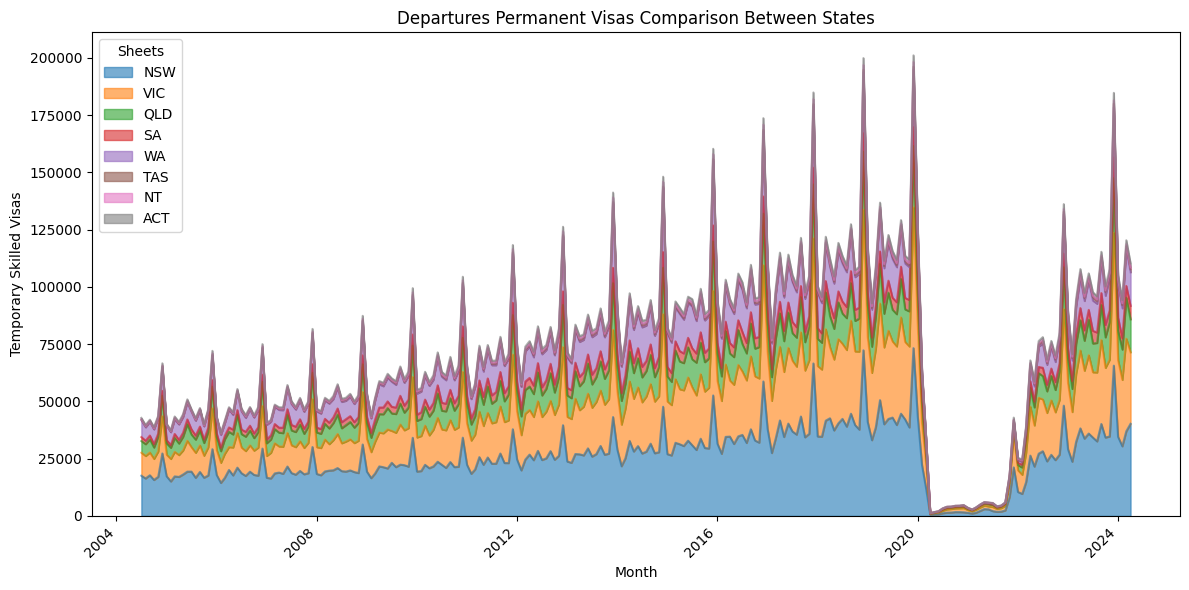

In [337]:
plt.figure(figsize=(12, 6))

# Dictionary to hold data for stacking
data_to_stack = {}

for sheet, DEP_DF in dataframes.items():
    
    if 'Month' in DEP_DF.columns and 'P_Visas_TOTAL' in DEP_DF.columns:
        DEP_DF['Month'] = pd.to_datetime(DEP_DF['Month'], errors='coerce')
        DEP_DF['P_Visas_TOTAL'] = pd.to_numeric(DEP_DF['P_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            data_to_stack[sheet] = DEP_DF.set_index('Month')['P_Visas_TOTAL']
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'P_Visas_TOTAL'")

# Concatenate all series into a DataFrame
stacked_df = pd.DataFrame(data_to_stack)

# Plot the stacked area plot
stacked_df.plot.area(figsize=(12, 6), alpha=0.6)

plt.xlabel('Month')
plt.ylabel('Temporary Skilled Visas')
plt.title('Departures Permanent Visas Comparison Between States')
plt.legend(title='Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

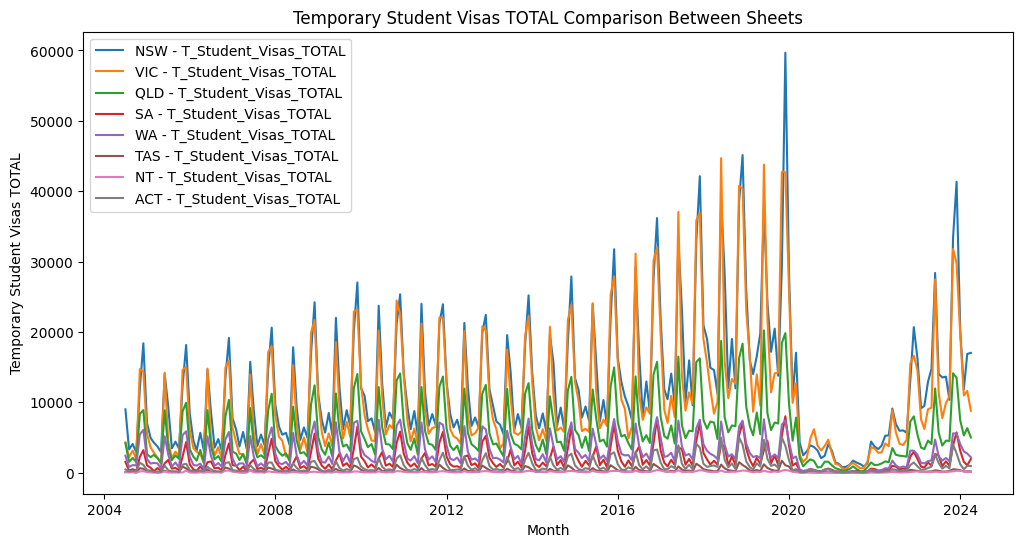

In [319]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Student_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Student_Visas_TOTAL'] = pd.to_numeric(ARR_DF['T_Student_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Student_Visas_TOTAL'], label=f'{sheet} - T_Student_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Student_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('Temporary Student Visas TOTAL')
plt.title('Temporary Student Visas TOTAL Comparison Between Sheets')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

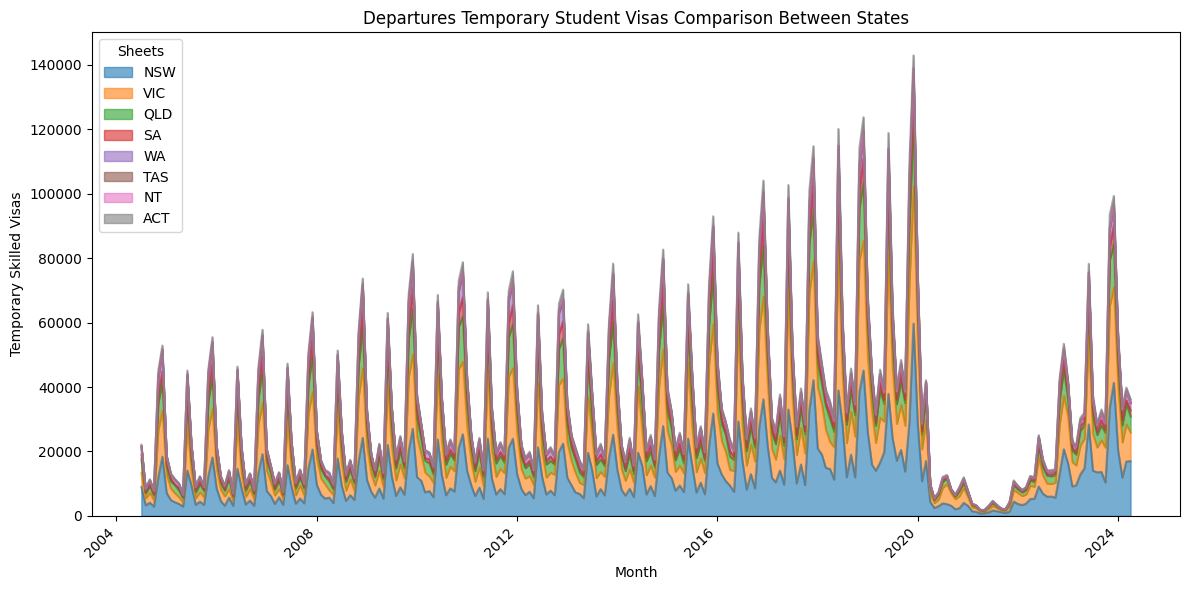

In [339]:
plt.figure(figsize=(12, 6))

# Dictionary to hold data for stacking
data_to_stack = {}

for sheet, DEP_DF in dataframes.items():
    
    if 'Month' in DEP_DF.columns and 'T_Student_Visas_TOTAL' in DEP_DF.columns:
        DEP_DF['Month'] = pd.to_datetime(DEP_DF['Month'], errors='coerce')
        DEP_DF['T_Student_Visas_TOTAL'] = pd.to_numeric(DEP_DF['T_Student_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            data_to_stack[sheet] = DEP_DF.set_index('Month')['T_Student_Visas_TOTAL']
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Student_Visas_TOTAL'")

# Concatenate all series into a DataFrame
stacked_df = pd.DataFrame(data_to_stack)

# Plot the stacked area plot
stacked_df.plot.area(figsize=(12, 6), alpha=0.6)

plt.xlabel('Month')
plt.ylabel('Temporary Skilled Visas')
plt.title('Departures Temporary Student Visas Comparison Between States')
plt.legend(title='Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

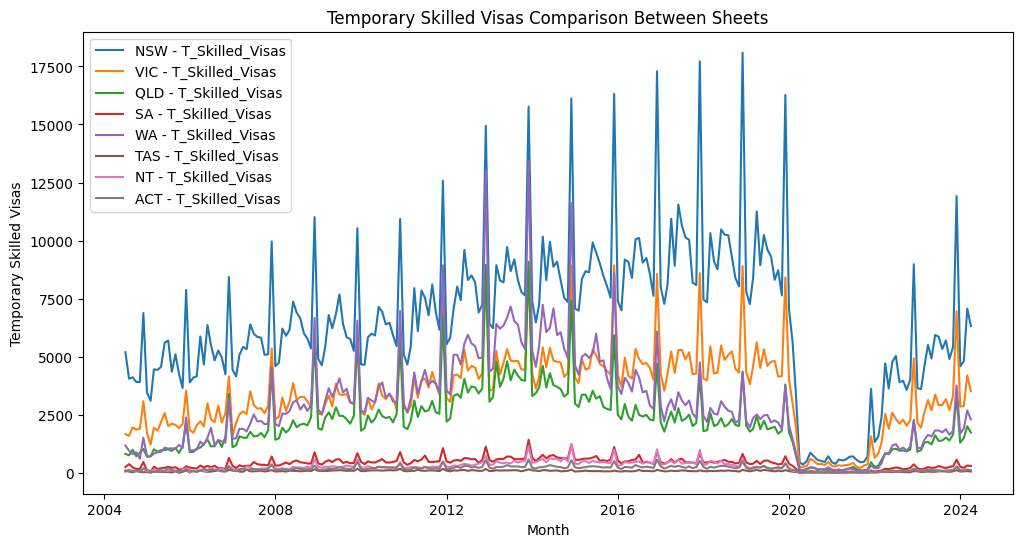

In [320]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Skilled_Visas' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Skilled_Visas'] = pd.to_numeric(ARR_DF['T_Skilled_Visas'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Skilled_Visas'], label=f'{sheet} - T_Skilled_Visas')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Skilled_Visas'")

plt.xlabel('Month')
plt.ylabel('Temporary Skilled Visas')
plt.title('Temporary Skilled Visas Comparison Between Sheets')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

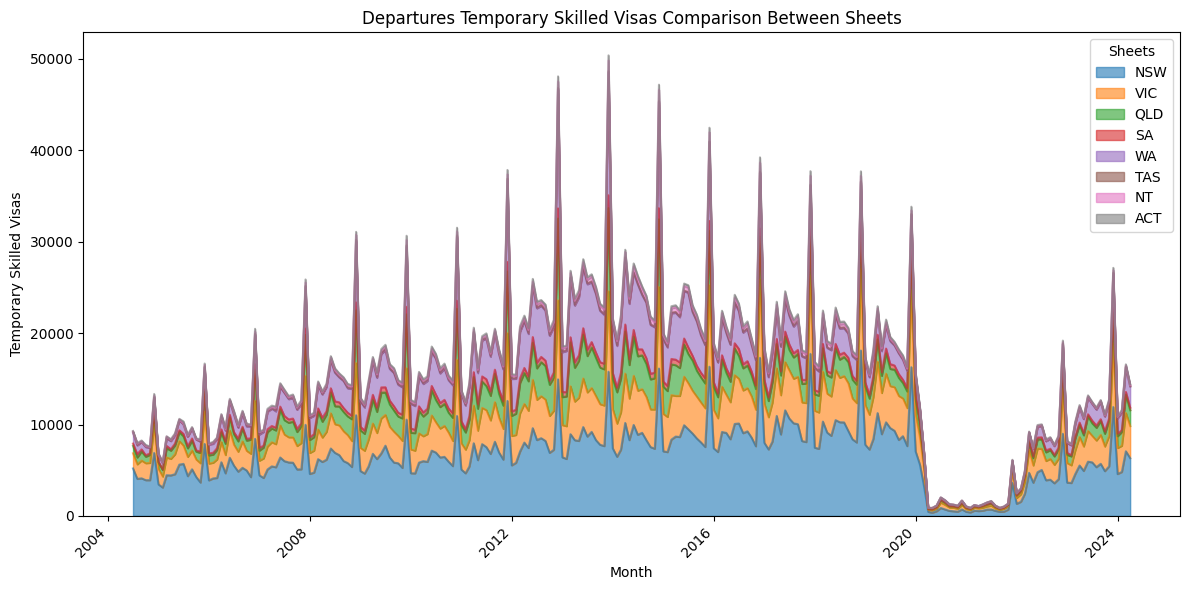

In [335]:
plt.figure(figsize=(12, 6))

# Dictionary to hold data for stacking
data_to_stack = {}

for sheet, DEP_DF in dataframes.items():
    
    if 'Month' in DEP_DF.columns and 'T_Skilled_Visas' in DEP_DF.columns:
        DEP_DF['Month'] = pd.to_datetime(DEP_DF['Month'], errors='coerce')
        DEP_DF['T_Skilled_Visas'] = pd.to_numeric(DEP_DF['T_Skilled_Visas'], errors='coerce')
        
        if sheet != 'Overall':
            data_to_stack[sheet] = DEP_DF.set_index('Month')['T_Skilled_Visas']
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Skilled_Visas'")

# Concatenate all series into a DataFrame
stacked_df = pd.DataFrame(data_to_stack)

# Plot the stacked area plot
stacked_df.plot.area(figsize=(12, 6), alpha=0.6)

plt.xlabel('Month')
plt.ylabel('Temporary Skilled Visas')
plt.title('Departures Temporary Skilled Visas Comparison Between States')
plt.legend(title='Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph shows the distribution of Family Visas within both the Departures and Arrivals categories. 

In [353]:
if 'P_Fam_Visas' in travel_data_ARR.columns and 'Permanent Family Visas' in travel_data_DEP.columns:
    # Optional: Convert columns to numeric if needed
    travel_data_ARR['P_Fam_Visas'] = pd.to_numeric(travel_data_ARR['P_Fam_Visas'], errors='coerce')
    travel_data_DEP['Permanent Family Visas'] = pd.to_numeric(travel_data_DEP['Permanent Family Visas'], errors='coerce')

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Plot histograms for arrivals and departures
    travel_data_ARR['P_Fam_Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Departures', color='red')
    travel_data_DEP['Permanent Family Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Arrivals', color='blue')

    # Adding labels, title, and legend
    plt.legend()
    plt.title('Distribution of Family Visas')
    plt.xlabel('Number of Visas')
    plt.ylabel('Frequency')  # Added y-axis label for clarity

    # Show the plot
    plt.show()
else:
    print("One or both columns are missing or misnamed in the DataFrames.")

One or both columns are missing or misnamed in the DataFrames.


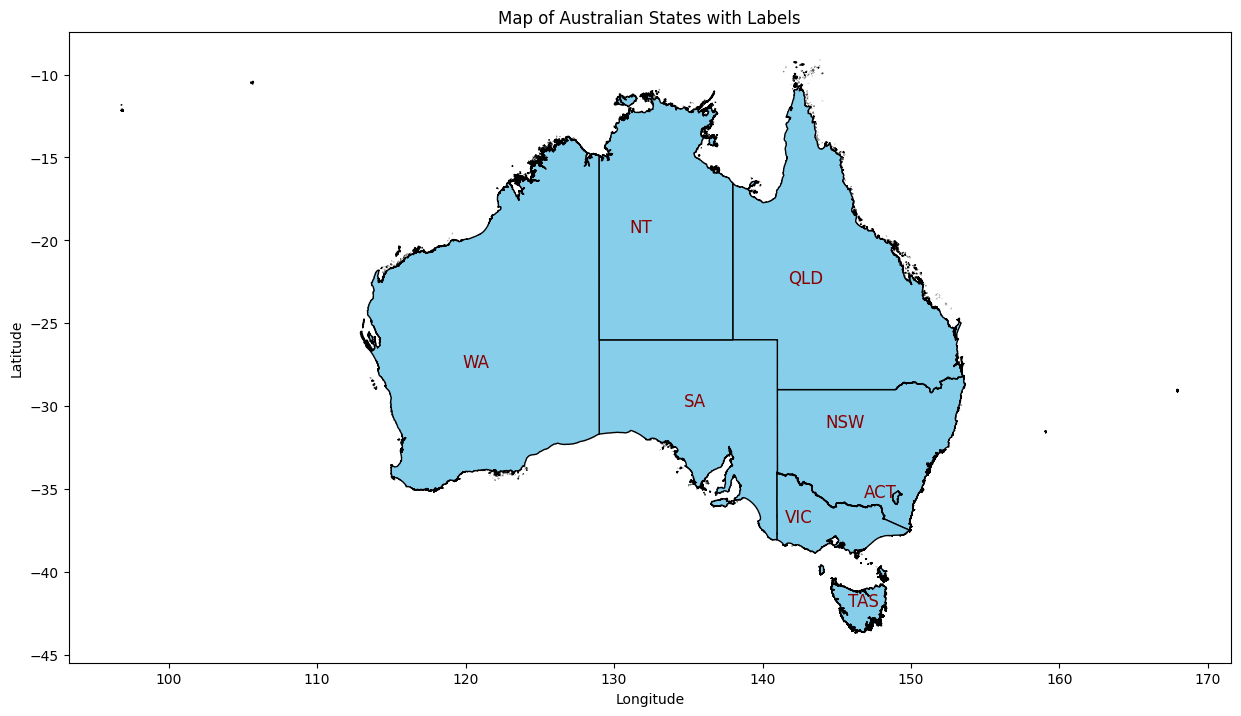

In [350]:
shapefile_path = r"C:\Users\ameli\1161\travel_dataproject\Aus Map Shape.zip"

# Sample data for labels
labels_data = {
    'Location': ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'NT', 'ACT', 'TAS'],
    'Latitude': [-31.2532, -36.9848, -22.5752, -27.6728, -30.0002, -19.4914, -35.4735, -42.0409],
    'Longitude': [146.9211, 143.3906, 144.0848, 121.6283, 136.2092, 132.5510, 149.0124, 147.8087]
}
labels_df = pd.DataFrame(labels_data)

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Ensure data types are correct
    labels_df['Latitude'] = pd.to_numeric(labels_df['Latitude'], errors='coerce')
    labels_df['Longitude'] = pd.to_numeric(labels_df['Longitude'], errors='coerce')

    # Plot the map
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, color='skyblue', edgecolor='black')

    # Add labels
    for idx, row in labels_df.iterrows():
        ax.text(
            row['Longitude'],   # Longitude value from labels_df
            row['Latitude'],    # Latitude value from labels_df
            row['Location'],    # Location name from labels_df
            fontsize=12,
            ha='right',
            color='darkred'
        )

    # Set plot title and labels
    ax.set_title('Map of Australian States with Labels')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()

except Exception as e:
    print(f"An error occurred while reading the shapefile: {e}")

# This next section just shows the sum of the category "Permanent Visas - Total", "Temporary Student Visas - Total" and "Temporary Skilled Visas".  

In [301]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Permanent Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Permanent Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Permanent Visas
0             VIC              5271090.0
1             NSW              6289560.0
2             QLD              2455640.0
3              WA              2759120.0
4              SA               880620.0
5             TAS               130910.0
6             ACT               238230.0
7              NT               169200.0


<Figure size 640x480 with 0 Axes>

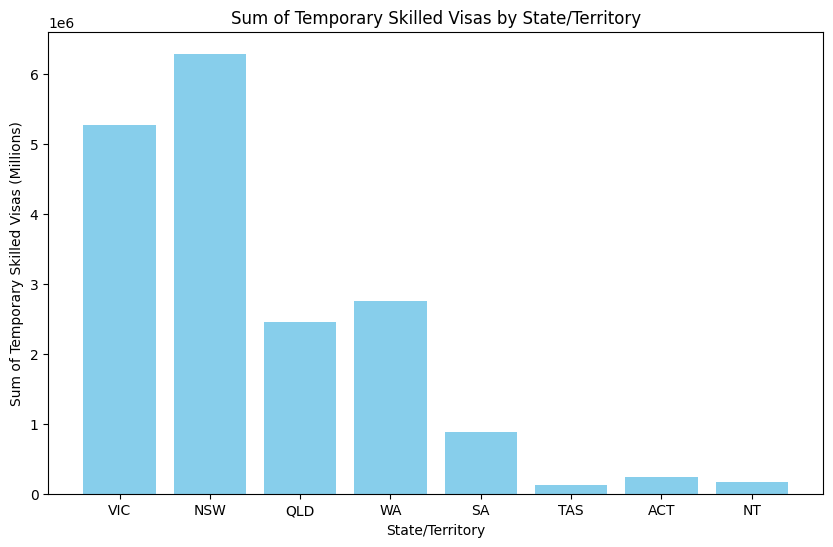

In [302]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [5271090.0, 6289560.0, 2455640.0, 2759120.0, 880620.0, 130910.0, 238230.0, 169200.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

In [303]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Student Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Permanent Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Permanent Visas
0             VIC              2957140.0
1             NSW              3354840.0
2             QLD              1523570.0
3              WA               766570.0
4              SA               495310.0
5             TAS                84800.0
6             ACT               239360.0
7              NT                42080.0


<Figure size 640x480 with 0 Axes>

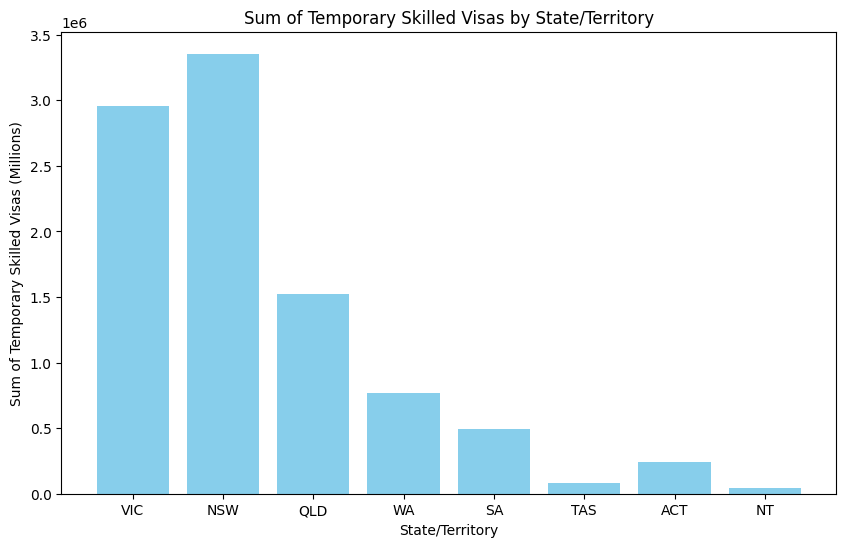

In [304]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [2957140.0, 3354840.0, 1523570.0, 766570.0, 495310.0, 84800.0, 239360.0, 42080.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

In [305]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Skilled Visas'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Temporary Skilled Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Temporary Skilled Visas
0             VIC                       881970.0
1             NSW                      1607420.0
2             QLD                       596310.0
3              WA                       751880.0
4              SA                       111250.0
5             TAS                        18270.0
6             ACT                        46600.0
7              NT                        82390.0


<Figure size 640x480 with 0 Axes>

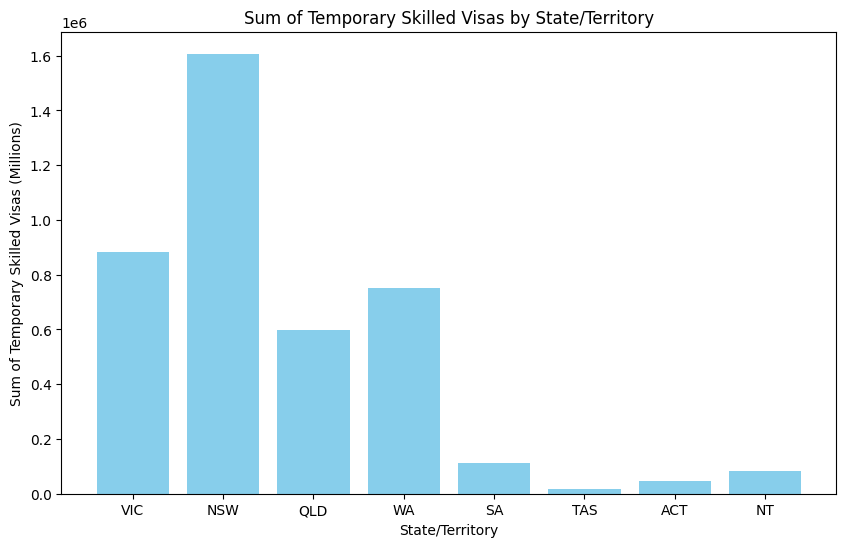

In [306]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [881970.0, 1607420.0, 596310.0, 751880.0, 111250.0, 18270.0, 46600.0, 82390.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

Piecharts for the underlying categories of Temporary Student Visas

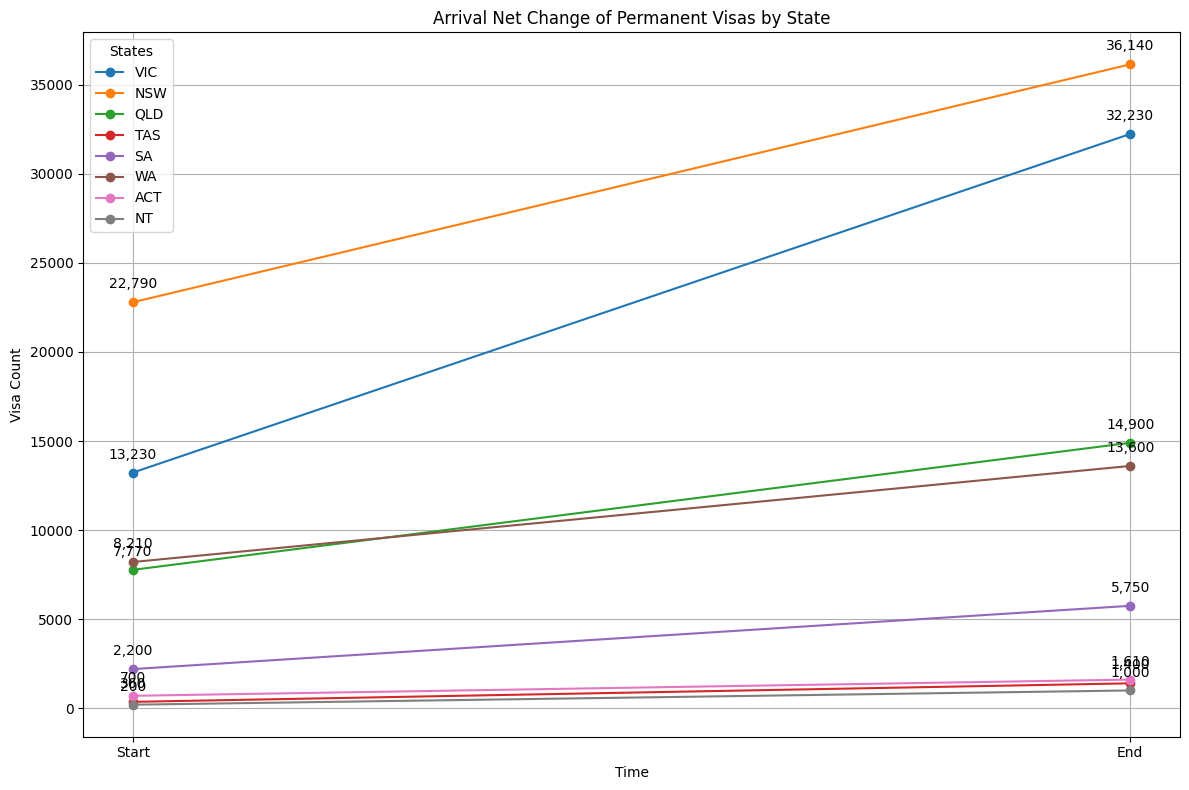

In [343]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [13230, 22790, 7770, 360, 2200, 8210, 700, 200]  # Replace with actual starting values for each state
ending_values = [32230, 36140, 14900, 1400, 5750, 13600, 1610, 1000]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Permanent Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

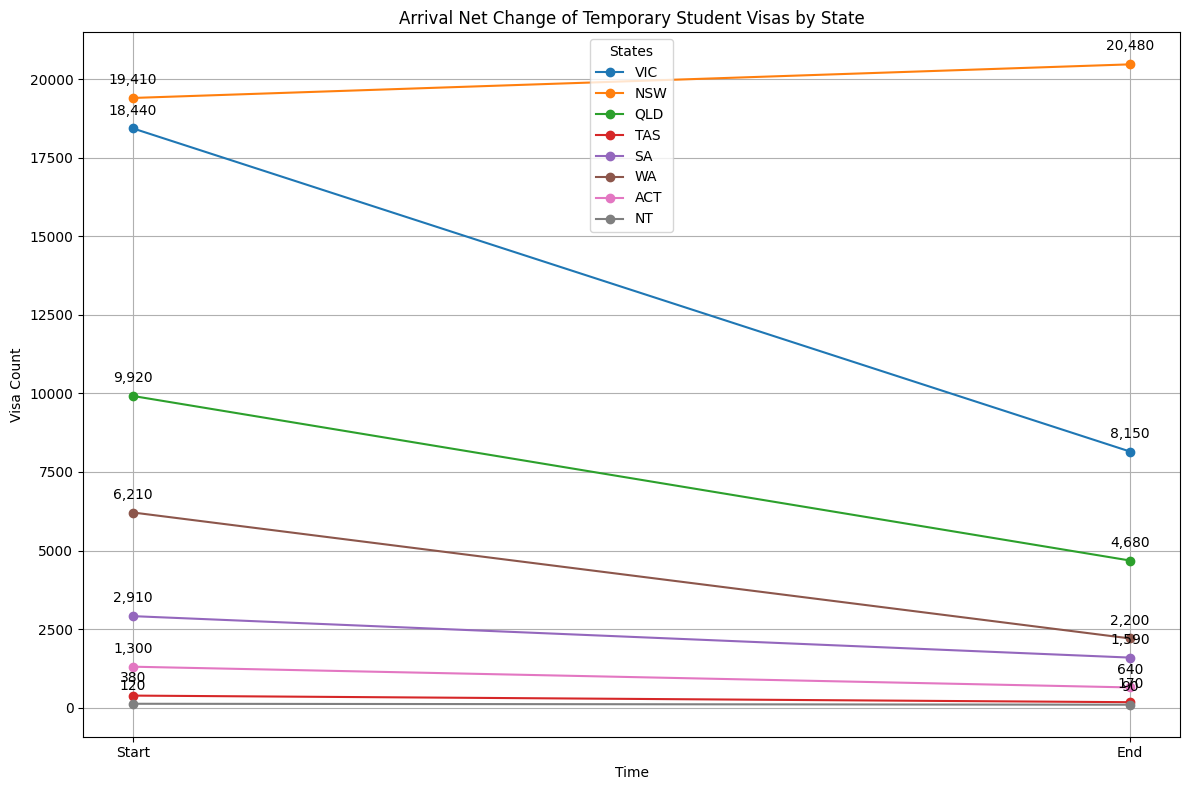

In [310]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [18440, 19410, 9920, 380, 2910, 6210, 1300, 120]  # Replace with actual starting values for each state
ending_values = [8150, 20480, 4680, 170, 1590, 2200, 640, 90]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Temporary Student Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

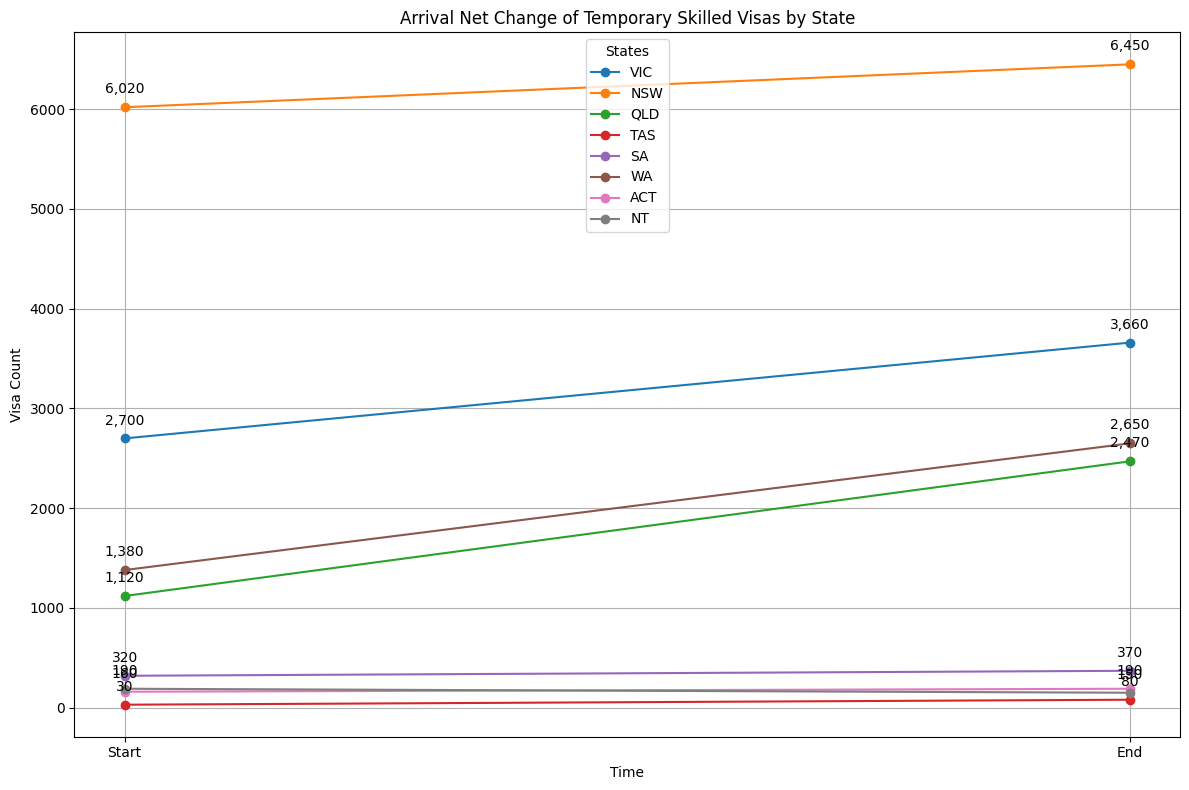

In [311]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [2700, 6020, 1120, 30, 320, 1380, 160, 190]  # Replace with actual starting values for each state
ending_values = [3660, 6450, 2470, 80, 370, 2650, 190, 150]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Temporary Skilled Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

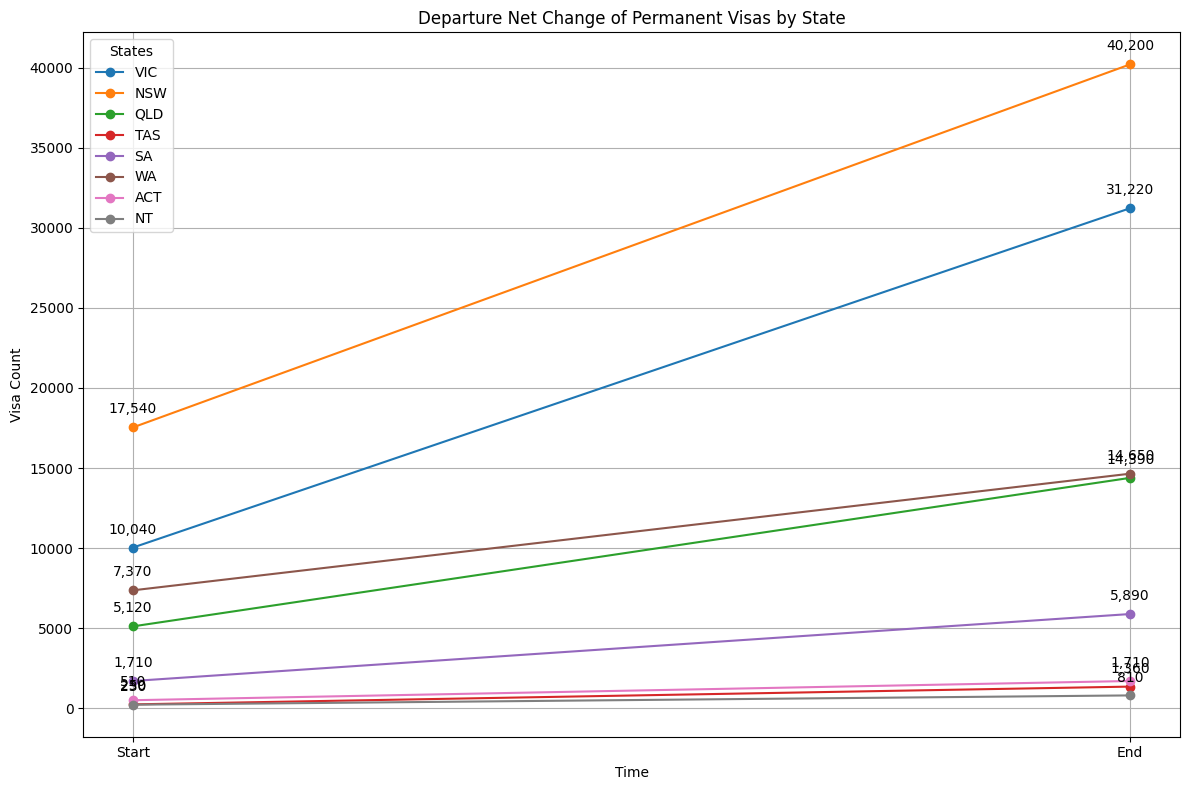

In [312]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [10040, 17540, 5120, 250, 1710, 7370, 510, 230]  # Replace with actual starting values for each state
ending_values = [31220, 40200, 14390, 1360, 5890, 14650, 1710, 810]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Departure Net Change of Permanent Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

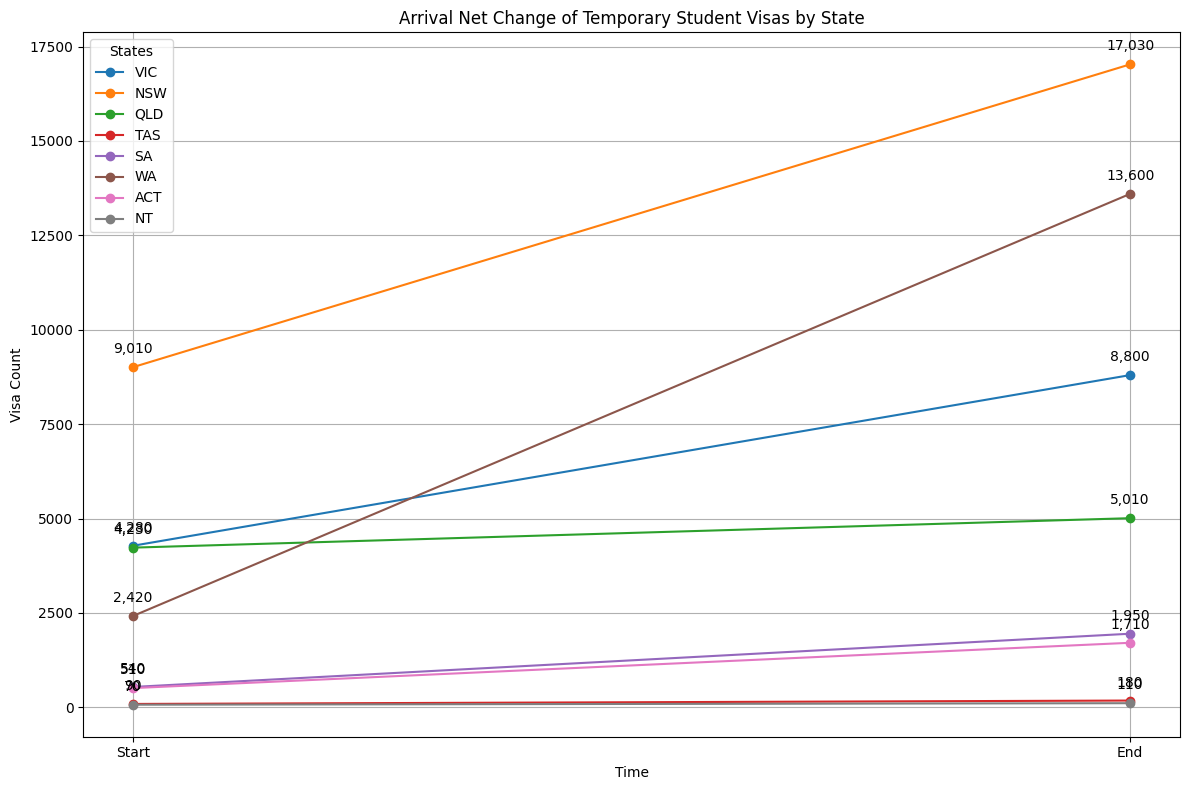

In [313]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [4280, 9010, 4230, 90, 540, 2420, 510, 70]  # Replace with actual starting values for each state
ending_values = [8800, 17030, 5010, 180, 1950, 13600, 1710, 110]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Temporary Student Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

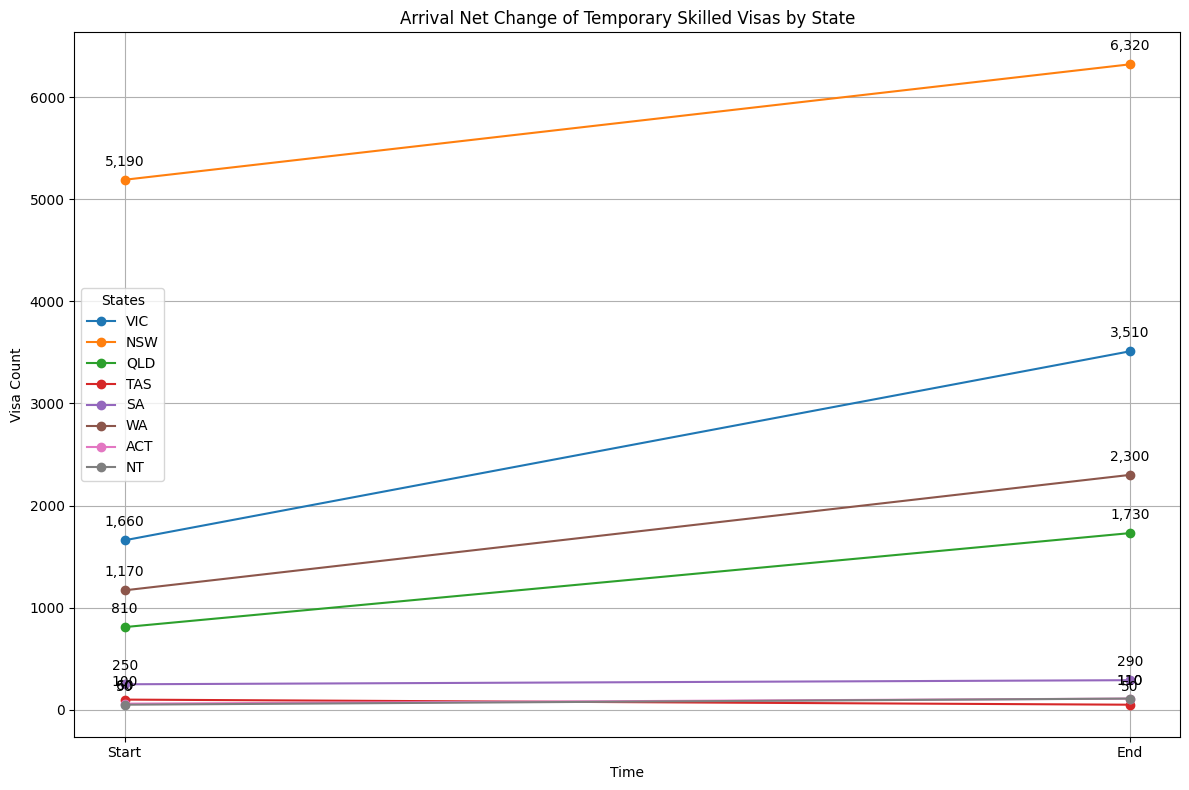

In [314]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [1660, 5190, 810, 100, 250, 1170, 60, 50]  # Replace with actual starting values for each state
ending_values = [3510, 6320, 1730, 50, 290, 2300, 110, 110]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Temporary Skilled Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [315]:
travel_data_ARR.head()

,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,37390.0,5170.0,8550.0,9060.0,22790.0,6850.0,1860.0,2550.0,880.0,4370.0,2910.0,19410.0,6020.0,114880.0,3280.0,2750.0,146340.0,1200.0,359890.0
1,2004-08-01,37500.0,5130.0,6710.0,7580.0,19430.0,2110.0,870.0,450.0,460.0,1080.0,250.0,5220.0,5180.0,105300.0,4340.0,2750.0,122780.0,980.0,304160.0
2,2004-09-01,36180.0,4490.0,6710.0,7860.0,19060.0,1000.0,800.0,190.0,790.0,580.0,270.0,3640.0,4400.0,97500.0,7390.0,2710.0,115640.0,960.0,299870.0
3,2004-10-01,39900.0,5170.0,7140.0,9010.0,21320.0,2040.0,1210.0,830.0,890.0,480.0,440.0,5900.0,5600.0,119060.0,7440.0,2380.0,140380.0,1360.0,373070.0
4,2004-11-01,33620.0,4470.0,6190.0,7370.0,18030.0,1520.0,670.0,140.0,470.0,440.0,370.0,3600.0,4140.0,138590.0,7420.0,2510.0,156270.0,1810.0,326660.0


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [150]:
travel_data_ARR.sample(5)


,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
230,2023-09-01,46550.0,7910.0,9420.0,16230.0,33570.0,13360.0,4300.0,130.0,2170.0,730.0,630.0,21320.0,6880.0,143410.0,11990.0,13140.0,196740.0,340.0,546280.0
181,2019-08-01,41180.0,8690.0,14920.0,17980.0,41580.0,17870.0,4050.0,150.0,1470.0,900.0,840.0,25270.0,9220.0,207460.0,7470.0,9430.0,258850.0,470.0,618430.0
72,2010-07-01,41520.0,6990.0,9170.0,10660.0,26820.0,16330.0,3600.0,2270.0,880.0,640.0,2850.0,26580.0,7820.0,112840.0,4740.0,3840.0,155820.0,1510.0,460500.0
174,2019-01-01,50090.0,12250.0,28740.0,29540.0,70530.0,15400.0,8570.0,3140.0,1490.0,1560.0,1380.0,31530.0,17710.0,200500.0,9640.0,15270.0,274660.0,460.0,813630.0
23,2006-06-01,32830.0,4700.0,6470.0,6990.0,18160.0,2010.0,920.0,330.0,900.0,230.0,640.0,5030.0,5360.0,93900.0,4650.0,2370.0,111310.0,1410.0,283630.0


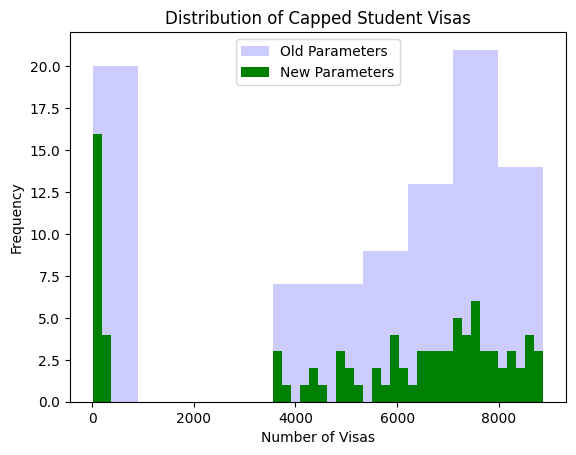

In [193]:
capped_Temp_Student_Visas_data = travel_data_ARR['Temporary Student Visas - Total'][travel_data_ARR['Temporary Student Visas - Total'] < 9000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Student_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Student_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Student Visas')
plt.legend()

# Display the plot
plt.show()

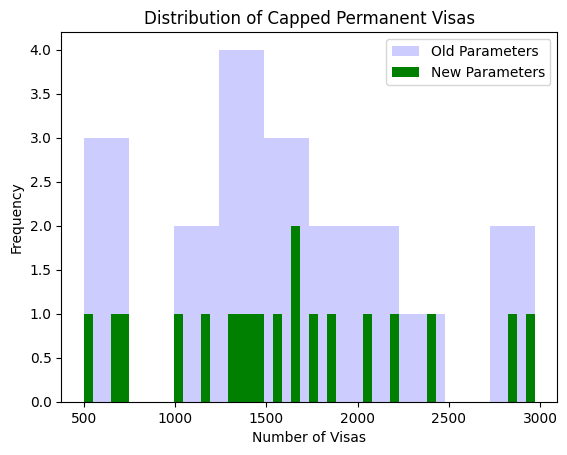

In [183]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

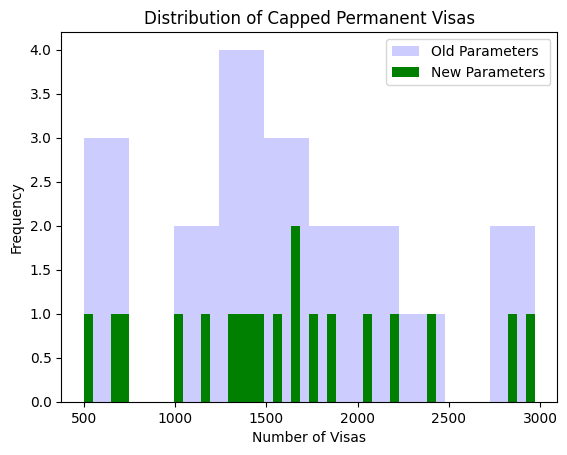

In [174]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

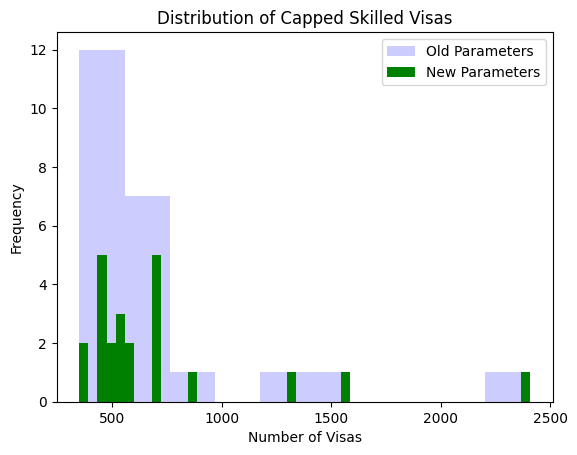

In [175]:
capped_Temp_Skilled_Visas_data = travel_data_DEP["Temporary Skilled Visas"][travel_data_DEP["Temporary Skilled Visas"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Skilled Visas')
plt.legend()

# Display the plot
plt.show()